In [1]:
#data wrangling
import pandas as pd

#datetime
import datetime as dt


In [2]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
Transactions = pd.read_excel("KPMG.xlsx", sheet_name="Transactions")
print(Transactions.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62        

In [53]:
# in ra info bảng
print(Transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [54]:
# describe default
print(Transactions.describe())

       transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.

In [55]:
# describe các biến object
print(Transactions.describe(include=[object]))

       order_status  brand product_line product_class product_size
count         20000  19803        19803         19803        19803
unique            2      6            4             3            3
top        Approved  Solex     Standard        medium       medium
freq          19821   4253        14176         13826        12990


In [7]:
# describe all
print(Transactions.describe(include='all', datetime_is_numeric=True))  

        transaction_id   product_id   customer_id            transaction_date  \
count     20000.000000  20000.00000  20000.000000                       20000   
unique             NaN          NaN           NaN                         NaN   
top                NaN          NaN           NaN                         NaN   
freq               NaN          NaN           NaN                         NaN   
mean      10000.500000     45.36465   1738.246050  2017-07-01 14:08:05.280000   
min           1.000000      0.00000      1.000000         2017-01-01 00:00:00   
25%        5000.750000     18.00000    857.750000         2017-04-01 00:00:00   
50%       10000.500000     44.00000   1736.000000         2017-07-03 00:00:00   
75%       15000.250000     72.00000   2613.000000         2017-10-02 00:00:00   
max       20000.000000    100.00000   5034.000000         2017-12-30 00:00:00   
std        5773.647028     30.75359   1011.951046                         NaN   

        online_order order_

In [56]:
# count số dòng bị null ở mỗi cột
Transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [3]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all = Transactions.dropna()
print(df_dropna_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [15]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order = Transactions.dropna(subset=['online_order'])
print(df_dropna_online_order.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [16]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0 = Transactions.fillna(0)
print(df_fillna_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [17]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill = Transactions.fillna(method='ffill')
print(df_fillna_ffill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [18]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill = Transactions.fillna(method='bfill')
print(df_fillna_bfill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorical Data

In [4]:
# load sheet Demographic và hiển thị top head
Demographic = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')
print(Demographic.head())


   customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property

C:\Users\adm\AppData\Local\Temp\ipykernel_19356\2451497749.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  Demographic = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')


In [43]:
# in ra info bảng
print(Demographic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [21]:
# describe các giá trị object
print(Demographic.describe(include=[object]))

       first_name last_name  gender                             job_title  \
count        4000      3875    4000                                  3494   
unique       3139      3725       6                                   195   
top           Max  Pristnor  Female  Business Systems Development Analyst   
freq            5         3    2037                                    45   

       job_industry_category wealth_segment deceased_indicator  default  \
count                   3344           4000               4000     3698   
unique                     9              3                  2       90   
top            Manufacturing  Mass Customer                  N      100   
freq                     799           2000               3998      113   

       owns_car  
count      4000  
unique        2  
top         Yes  
freq       2024  


In [5]:
# Remove all NA rows, then use output for the following steps
Demographic = Demographic.dropna(axis='index')
print(Demographic.head())

   customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp       F   
1            2        Eli    Bockman    Male   
2            3      Arlin     Dearle    Male   
8            9       Mala       Lind  Female   
9           10   Fiorenze    Birdall  Female   

   past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
8                                   97 1973-03-10   
9                                   49 1988-10-11   

                              job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

 

In [8]:
# In ra các giá trị unique của cột gender
print(Demographic['gender'].unique())

['F' 'Male' 'Female' 'Femal']


In [6]:
# Quy chuẩn cột gender về 2 nhóm Male, Female, Unisex và in ra giá trị unique mới
Demographic['gender'] = Demographic['gender'].replace(['F', 'Femal', 'M', 'U'], ['Female', 'Female', 'Male', 'Unisex'])
print(Demographic['gender'].unique())


['Female' 'Male']


C:\Users\adm\AppData\Local\Temp\ipykernel_19356\1415266992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Demographic['gender'] = Demographic['gender'].replace(['F', 'Femal', 'M', 'U'], ['Female', 'Female', 'Male', 'Unisex'])


In [7]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "age" và in ra min age, max age
from datetime import date

today = date.today()
today = pd.to_datetime(today, errors='coerce')
Demographic['DOB'] = pd.to_datetime(Demographic['DOB'], errors='coerce')
Demographic['age'] = (today-Demographic['DOB']).astype('<m8[Y]')
print(Demographic['age'].min())
print(Demographic['age'].max())


20.0
91.0


In [8]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 35 - 55 là "Middle", trên 55 là "Older"
# lưu vào cột "age_group" bằng cách sử dụng hàm cut
cut_off = [0, 35, 55, 100]
labels = ['Young', 'Middle', 'Older']
Demographic['age_group'] = pd.cut(Demographic['age'], bins=cut_off, labels=labels)
print(Demographic.head())

   customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            2        Eli    Bockman    Male   
2            3      Arlin     Dearle    Male   
8            9       Mala       Lind  Female   
9           10   Fiorenze    Birdall  Female   

   past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
8                                   97 1973-03-10   
9                                   49 1988-10-11   

                              job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

 

# 2. Data Completeness

In [9]:
#join bảng transactions vs demographic (đều đã dropna) và in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)
import numpy as np
table_merge = df_dropna_all.merge(Demographic, on='customer_id')
print(table_merge[np.logical_or(table_merge['first_name'].isnull(), table_merge['last_name'].isnull())])

Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date, first_name, last_name, gender, past_3_years_bike_related_purchases, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, default, owns_car, tenure, age, age_group]
Index: []

[0 rows x 27 columns]


# 3. Data Aggregation (after dropping null values)

In [74]:
# tính tổng khách hàng có phát sinh giao dịch bằng hàm nunique
table_merge['customer_id'].nunique()

2329

In [10]:
# Tính số khách hàng mỗi tháng
# hint 1: tạo column year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
table_merge['year_month'] = table_merge['transaction_date'].dt.strftime('%Y%m')
table_merge.groupby('year_month')['customer_id'].nunique()

year_month
201701    878
201702    859
201703    848
201704    876
201705    871
201706    826
201707    868
201708    888
201709    826
201710    886
201711    869
201712    877
Name: customer_id, dtype: int64

In [11]:
# Tính gross margin của mỗi tháng. gross_margin = list_price - standard_cost
# hint 1: tạo column gross_margin
# hint 2: group by year_month và sử dụng hàm agg
table_merge['gross_margin'] = table_merge['list_price'] - table_merge['standard_cost']
table_merge.groupby('year_month').agg({'gross_margin':'sum'})

,gross_margin
year_month,
201701,598361.59
201702,585956.49
201703,583459.93
201704,614345.11
201705,612053.28
201706,557927.11
201707,602030.44
201708,629727.79
201709,557052.49


In [15]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
table_merge.groupby(['online_order', 'order_status']).agg({'order_status':'count'},{'gross_margin':'sum'})


order_status
online_order order_status              
0.0          Approved              6456
             Cancelled               51
1.0          Approved              6399
             Cancelled               76

# 4. Data Visualization

In [28]:
# Sử dụng seaborn và vẽ ra 5 chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
import seaborn as sns
import matplotlib.pyplot as plt

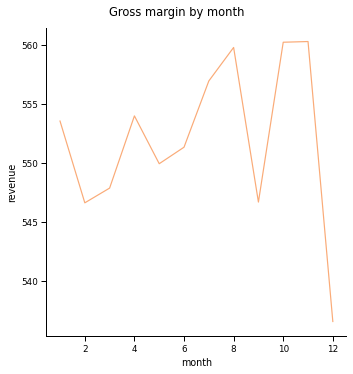

In [19]:
#Line plot
#Ban đầu em dùng cột year_month để tạo line plot nhưng trục x không sắp xếp theo thứ tự từ tháng 1-12 mà nó xếp loạn lên ạ, 
#em tạo cột month mới bằng hàm DatetimeIndex thì lại được ạ. Em cũng chưa hiểu sao dùng hàm Strftime nó lại bị xếp không đúng
#thứ tự, anh giải thích cho em phần này với ạ
table_merge['month'] = pd.DatetimeIndex(table_merge['transaction_date']).month
sns.set_context('paper')
sns.set_palette(['#FAAB78'])
g = sns.relplot(x='month', y='gross_margin', data=table_merge, kind='line', ci=None)
g.fig.suptitle('Gross margin by month', y=1.03)
g.set(xlabel='month', ylabel='revenue')
plt.show()


In [25]:
table_merge['online_order'].value_counts()

0.0    6507
1.0    6475
Name: online_order, dtype: int64

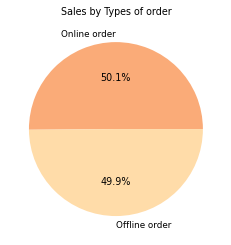

In [37]:
#Pie chart
slice = [6507,6475]
labels = ['Online order', 'Offline order']
colors = ['#FAAB78', '#FFDCA9']
plt.pie(slice, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Sales by Types of order')
plt.show()

In [30]:
table_merge['age_group'].value_counts()

Middle    6818
Young     3303
Older     2861
Name: age_group, dtype: int64

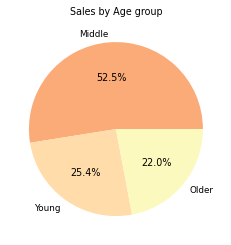

In [36]:
#Pie chart
slice = [6818,3303, 2861]
labels = ['Middle', 'Young', 'Older']
colors = ['#FAAB78', '#FFDCA9', '#FCF9BE']
plt.pie(slice, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Sales by Age group')
plt.show()

Text(0.5, 1.03, 'Sale by Brand')

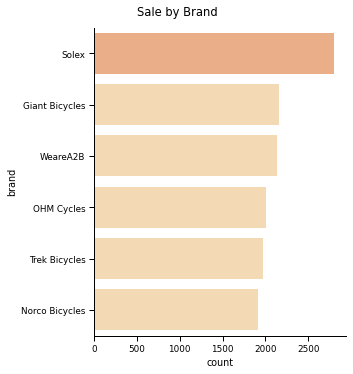

In [18]:
#Count plot
sns.set_context('paper')
sns.set_palette(['#FAAB78', '#FFDCA9', '#FFDCA9', '#FFDCA9', '#FFDCA9', '#FFDCA9'])
g = sns.catplot(y='brand', data=table_merge, kind='count', order=['Solex', 'Giant Bicycles', 'WeareA2B', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles'])
g.fig.suptitle('Sale by Brand', y=1.03)


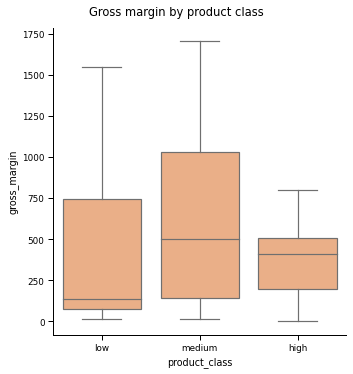

In [24]:
#Box plot
sns.set_palette(['#FAAB78', '#FAAB78', '#FAAB78'])
g = sns.catplot(x='product_class', y='gross_margin', data=table_merge, order=['low', 'medium', 'high'], kind='box', sym=' ', whis=[0, 100])
g.fig.suptitle('Gross margin by product class', y=1.03)
plt.show()

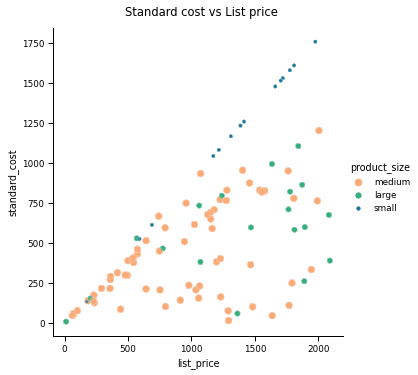

In [35]:
#Scatter chart
sns.set_palette(['#FAAB78', '#36AE7C', '#187498'])
g = sns.relplot(x='list_price', y='standard_cost', data=table_merge, kind='scatter', size='product_size', hue='product_size', alpha=0.4)
g.fig.suptitle('Standard cost vs List price', y=1.03)
plt.show()

#Anh ơi ở mục chú thích về product size, mình làm thế nào để large được chú thích bằng hình tròn to nhất ạ, em thấy ở đây 
#seaborn đặt medium là to nhất